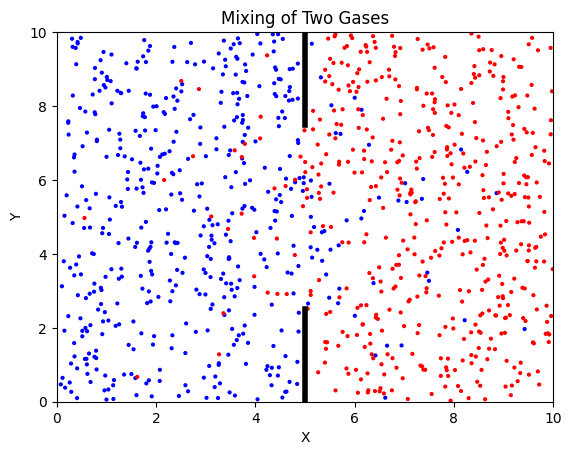

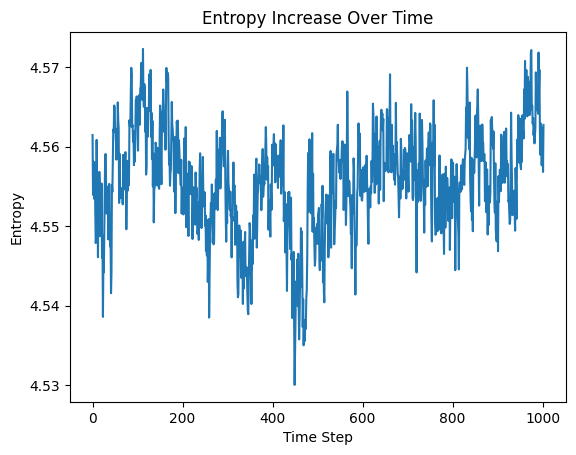

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Constants
n_particles = 1000
n_steps = 1000
box_size = 10
middle_gate_size = box_size / 2  # Size of the open gate in the middle
barrier_thickness = 4  # Thickness of the barrier lines

# Initialize positions of two sets of particles in two halves of the box
particles = np.zeros((n_particles, 2))
particles[:n_particles//2, 0] = np.random.uniform(0, box_size/2, n_particles//2)  # Left half
particles[:n_particles//2, 1] = np.random.uniform(0, box_size, n_particles//2)
particles[n_particles//2:, 0] = np.random.uniform(box_size/2, box_size, n_particles//2)  # Right half
particles[n_particles//2:, 1] = np.random.uniform(0, box_size, n_particles//2)

# Colors for the particles
colors = np.array(['blue'] * (n_particles//2) + ['red'] * (n_particles//2))

# Function to calculate entropy
def calculate_entropy(particles, box_size, num_bins):
    hist, _ = np.histogramdd(particles, bins=(num_bins, num_bins), range=((0, box_size), (0, box_size)))
    prob = hist / np.sum(hist)
    prob = prob[prob > 0]  # Remove zero probabilities to avoid log(0)
    entropy = -np.sum(prob * np.log(prob))
    return entropy

# Parameters for entropy calculation
num_bins = 10
entropies = []

# Set up the figure and axis for animation
fig, ax = plt.subplots()
scat = ax.scatter(particles[:, 0], particles[:, 1], c=colors, s=4)
ax.set_xlim(0, box_size)
ax.set_ylim(0, box_size)
ax.set_title('Mixing of Two Gases')
ax.set_xlabel('X')
ax.set_ylabel('Y')

# Draw the middle barrier with an open gate
gate_bottom = (box_size - middle_gate_size) / 2
gate_top = (box_size + middle_gate_size) / 2
ax.plot([box_size/2, box_size/2], [0, gate_bottom], color='black', linewidth= barrier_thickness)
ax.plot([box_size/2, box_size/2], [gate_top, box_size], color='black', linewidth= barrier_thickness)

# Animation update function
def update(frame):
    global particles
    move = np.random.uniform(-0.1, 0.1, particles.shape)
    new_positions = particles + move
    
    # Check for collisions with the walls and middle barrier
    for i in range(n_particles):
        if new_positions[i, 0] < 0 or new_positions[i, 0] > box_size:
            move[i, 0] = -move[i, 0]  # Reflect the movement
        if new_positions[i, 1] < 0 or new_positions[i, 1] > box_size:
            move[i, 1] = -move[i, 1]  # Reflect the movement
        if (box_size/2 - 0.1 < new_positions[i, 0] < box_size/2 + 0.1 and
            (new_positions[i, 1] < gate_bottom or new_positions[i, 1] > gate_top)):
            move[i, 0] = -move[i, 0]  # Reflect the movement if hitting the barrier
        
    particles += move

    entropy = calculate_entropy(particles, box_size, num_bins)
    entropies.append(entropy)
    scat.set_offsets(particles)
    return scat,

# Create animation
ani = animation.FuncAnimation(fig, update, frames=n_steps, interval=100, blit=True)

# Save animation as GIF
ani.save('gas_mixing.gif', writer='pillow')

# Plot entropy over time
plt.figure()
plt.plot(entropies)
plt.xlabel('Time Step')
plt.ylabel('Entropy')
plt.title('Entropy Increase Over Time')
plt.show()
